# Rating vs Profit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column', None)
import warnings
warnings.filterwarnings('ignore')

### Concatenate the data into 1 dataframe for the remainder of the analysis.

In [2]:
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
year_2002 = pd.read_csv('Data/final_tmdb_data_2002.csv.gz')
year_2003 = pd.read_csv('Data/final_tmdb_data_2003.csv.gz')
year_2004 = pd.read_csv('Data/final_tmdb_data_2004.csv.gz')
year_2005 = pd.read_csv('Data/final_tmdb_data_2005.csv.gz')
year_2006 = pd.read_csv('Data/final_tmdb_data_2006.csv.gz')
year_2007 = pd.read_csv('Data/final_tmdb_data_2007.csv.gz')
year_2008 = pd.read_csv('Data/final_tmdb_data_2008.csv.gz')
year_2009 = pd.read_csv('Data/final_tmdb_data_2009.csv.gz')
year_2010 = pd.read_csv('Data/final_tmdb_data_2010.csv.gz')

In [3]:
df = pd.concat([year_2001, year_2002, year_2003, year_2004, year_2005,
               year_2006, year_2007, year_2008, year_2009, year_2010])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,20.950,/mUvikzKJJSg9khrVdxK8kg3TMHA.jpg,"[{'id': 85, 'logo_path': None, 'name': 'Konrad...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-25,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.323,1242.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,An elite Federal force whose objective is to e...,2.194,/u0njmfXD3dXxQfeykBHBuFQOYqD.jpg,[],[],2001-01-01,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,"A young woman is catapulted into pop stardom, ...",10.741,/b8gKsXB6d60SC2HKUcAAzTacn0S.jpg,"[{'id': 89627, 'logo_path': None, 'name': 'Gli...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-09-21,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,Trevor Blackburn is accused of murdering his g...,4.338,/b0p8CjMLWc7B1nnIfFQ2uY3HLe0.jpg,"[{'id': 3260, 'logo_path': None, 'name': 'Tse ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-03-30,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.156,32.0,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18670 entries, 0 to 2755
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                18670 non-null  object 
 1   adult                  18660 non-null  float64
 2   backdrop_path          10505 non-null  object 
 3   belongs_to_collection  1405 non-null   object 
 4   budget                 18660 non-null  float64
 5   genres                 18660 non-null  object 
 6   homepage               3548 non-null   object 
 7   id                     18660 non-null  float64
 8   original_language      18660 non-null  object 
 9   original_title         18660 non-null  object 
 10  overview               18215 non-null  object 
 11  popularity             18660 non-null  float64
 12  poster_path            16496 non-null  object 
 13  production_companies   18660 non-null  object 
 14  production_countries   18660 non-null  object 
 15  rel

In [5]:
df.duplicated().sum()

9

In [6]:
df.drop_duplicates(inplace=True)

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [7]:
# budget = df['budget'] > 0
# revenue = df['revenue'] > 0
# financial_filter = df.loc[budget | revenue]
filter_financial = (df['budget'] > 0) | (df['revenue']>0)
filter_financial.value_counts()

False    13328
True      5333
dtype: int64

In [8]:
len(filter_financial)

18661

In [9]:
df['Profit'] = df['revenue'] - df['budget']
print(df)

        imdb_id  adult                     backdrop_path  \
0             0    NaN                               NaN   
1     tt0035423    0.0  /tJLV3BAlHOgscVOrA99Wnb2gAef.jpg   
2     tt0114447    0.0                               NaN   
3     tt0118589    0.0  /9NZAirJahVilTiDNCHLFcdkwkiy.jpg   
4     tt0118652    0.0  /mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg   
...         ...    ...                               ...   
2751  tt7851834    0.0  /c4x2XPngdiW8Vmc6EmmTXAgzViJ.jpg   
2752  tt8090084    0.0                               NaN   
2753  tt8160720    0.0                               NaN   
2754  tt9164254    1.0                               NaN   
2755  tt9575206    0.0  /yejvp5VvZa6TnXodrQsYUKzF4Cs.jpg   

     belongs_to_collection      budget  \
0                      NaN         NaN   
1                      NaN  48000000.0   
2                      NaN         0.0   
3                      NaN  22000000.0   
4                      NaN   1000000.0   
...                    ... 

In [10]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Profit
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,20.950,/mUvikzKJJSg9khrVdxK8kg3TMHA.jpg,"[{'id': 85, 'logo_path': None, 'name': 'Konrad...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-25,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.323,1242.0,PG-13,28019048.0
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,An elite Federal force whose objective is to e...,2.194,/u0njmfXD3dXxQfeykBHBuFQOYqD.jpg,[],[],2001-01-01,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN,0.0
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,"A young woman is catapulted into pop stardom, ...",10.741,/b8gKsXB6d60SC2HKUcAAzTacn0S.jpg,"[{'id': 89627, 'logo_path': None, 'name': 'Gli...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-09-21,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13,-16728334.0
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,Trevor Blackburn is accused of murdering his g...,4.338,/b0p8CjMLWc7B1nnIfFQ2uY3HLe0.jpg,"[{'id': 3260, 'logo_path': None, 'name': 'Tse ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-03-30,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.156,32.0,R,-1000000.0


In [11]:
df = df.drop(columns=['backdrop_path','adult','id','popularity','belongs_to_collection','genres','homepage','original_language',
                 'original_title','overview','poster_path','production_companies','production_countries',
                 'release_date','runtime','spoken_languages','status','tagline','video','vote_average', 
                'vote_count'])
df.head()

,imdb_id,budget,revenue,title,certification,Profit
0,0,NaN,NaN,NaN,NaN,NaN
1,tt0035423,48000000.0,76019048.0,Kate & Leopold,PG-13,28019048.0
2,tt0114447,0.0,0.0,The Silent Force,NaN,0.0
3,tt0118589,22000000.0,5271666.0,Glitter,PG-13,-16728334.0
4,tt0118652,1000000.0,0.0,The Attic Expeditions,R,-1000000.0


In [12]:
Profited = df['Profit'] >= 1
df[Profited].head()

,imdb_id,budget,revenue,title,certification,Profit
1,tt0035423,48000000.0,76019048.0,Kate & Leopold,PG-13,28019048.0
5,tt0119004,0.0,6297.0,Don's Plum,NaN,6297.0
8,tt0120681,35000000.0,74558115.0,From Hell,R,39558115.0
9,tt0120737,93000000.0,871368364.0,The Lord of the Rings: The Fellowship of the Ring,PG-13,778368364.0
14,tt0125022,35000000.0,57756408.0,Heartbreakers,PG-13,22756408.0


In [13]:
profit_df = df[Profited].copy()

In [14]:
profit_df.dropna(subset =['certification'], inplace = True)

In [15]:
profit_group = profit_df.groupby('certification')['Profit'].sum()
profit_group

certification
G        4.929469e+09
NC-17    1.288866e+08
NR       1.735080e+09
PG       2.754992e+10
PG-13    5.368253e+10
R        2.097654e+10
Name: Profit, dtype: float64

In [16]:
profit_df['certification'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1547 entries, 1 to 2395
Series name: certification
Non-Null Count  Dtype 
--------------  ----- 
1547 non-null   object
dtypes: object(1)
memory usage: 24.2+ KB


In [17]:
G = profit_df[profit_df['certification'] == "G"]['Profit'].sum()
PG = profit_df[profit_df['certification'] == "PG"]['Profit'].sum()
PG_13 = profit_df[profit_df['certification'] == "PG-13"]['Profit'].sum()
R =profit_df[profit_df['certification'] == "R"]['Profit'].sum()
NR =profit_df[profit_df['certification'] == "NR"]['Profit'].sum()
print (G,PG,PG_13,R,NR)

4929469405.0 27549924308.0 53682527257.0 20976541176.0 1735080159.0


In [18]:
profit_df['certification'] = profit_df['certification'].astype(str)

In [29]:
profit_df.head()

,imdb_id,budget,revenue,title,certification,Profit
1,tt0035423,48000000.0,76019048.0,Kate & Leopold,PG-13,28019048.0
8,tt0120681,35000000.0,74558115.0,From Hell,R,39558115.0
9,tt0120737,93000000.0,871368364.0,The Lord of the Rings: The Fellowship of the Ring,PG-13,778368364.0
14,tt0125022,35000000.0,57756408.0,Heartbreakers,PG-13,22756408.0
15,tt0126029,60000000.0,487853320.0,Shrek,PG,427853320.0


In [19]:
#rating_df = profit_df[profit_group].copy()

# Create a bar plot

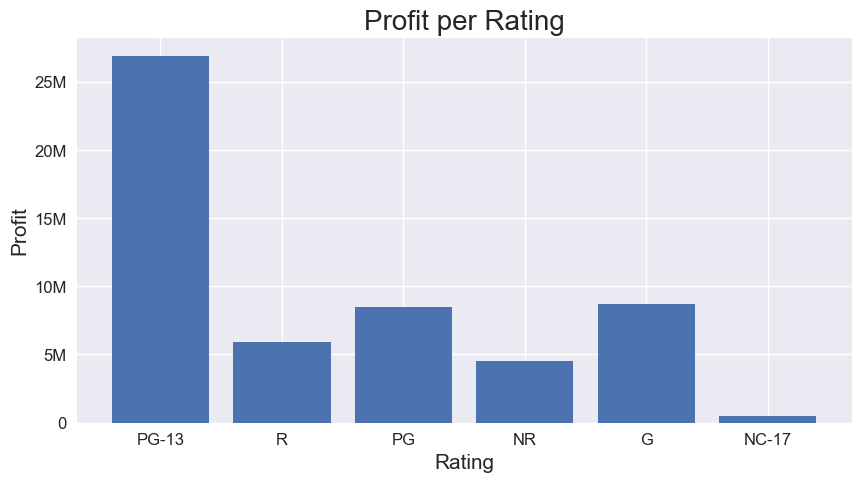

In [28]:
import matplotlib.ticker as mticker

Rating = profit_df['certification']
Profit = profit_df['Profit']
 
fig, axes = plt.subplots( figsize = (10,5))

## Plot the Profit
plt.style.use('seaborn')
plt.bar(Rating, Profit)
# Function to format labels in millions and thousands
def millions_thousands_formatter(x, pos):
    if x >= 1e8:
        return f'{x/1e8:.0f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_thousands_formatter))

# Set labels
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.title('Profit per Rating', fontsize = 20)
plt.tick_params(labelsize=12)

# Show the plot
plt.show()

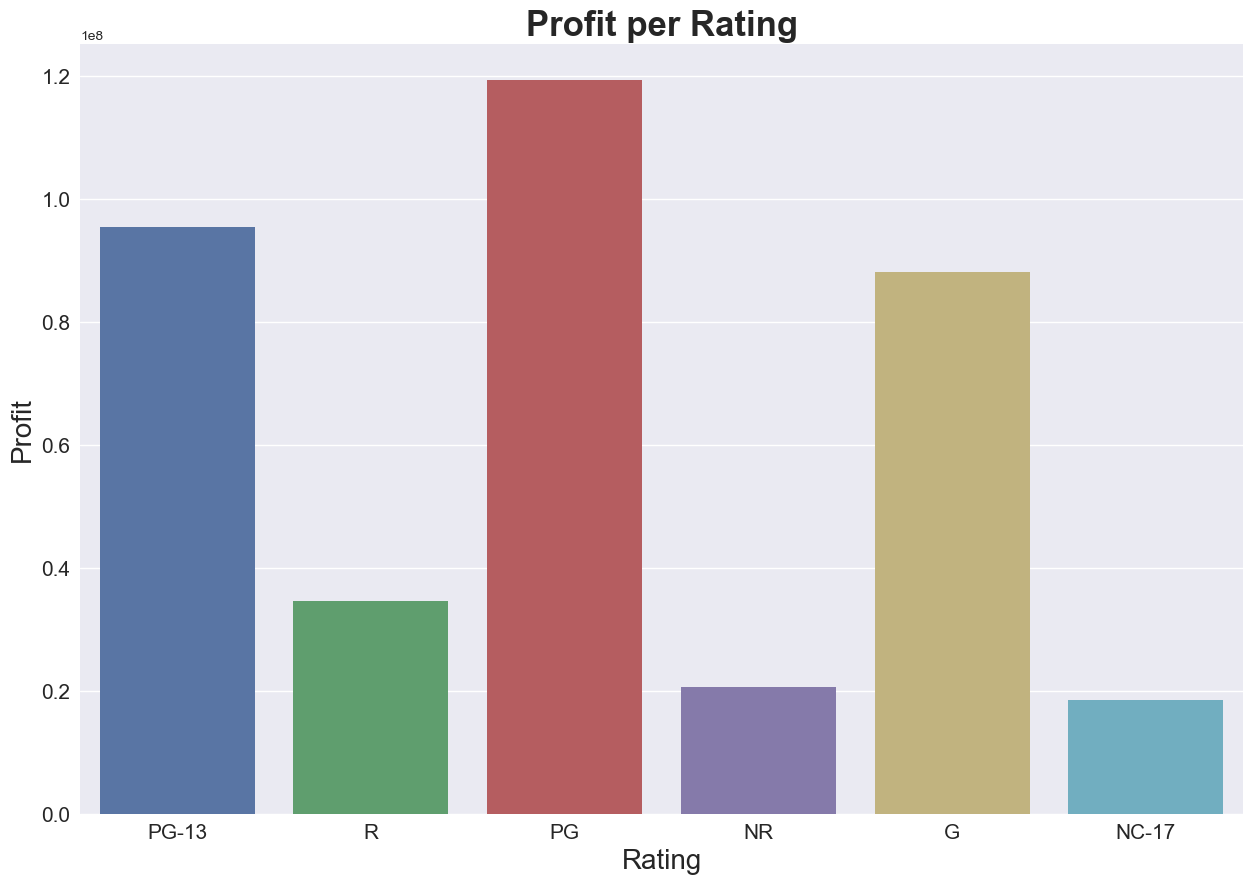

In [26]:
plt.style.use('seaborn')
fig, axes = plt.subplots( figsize = (15,10))

sns.barplot(data = profit_df, x = 'certification', y= 'Profit', errorbar=None)
plt.xlabel('Rating', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.title('Profit per Rating', fontsize = 25, fontweight = 'bold')
plt.tick_params(labelsize=15)

plt.show()

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [30]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NR']

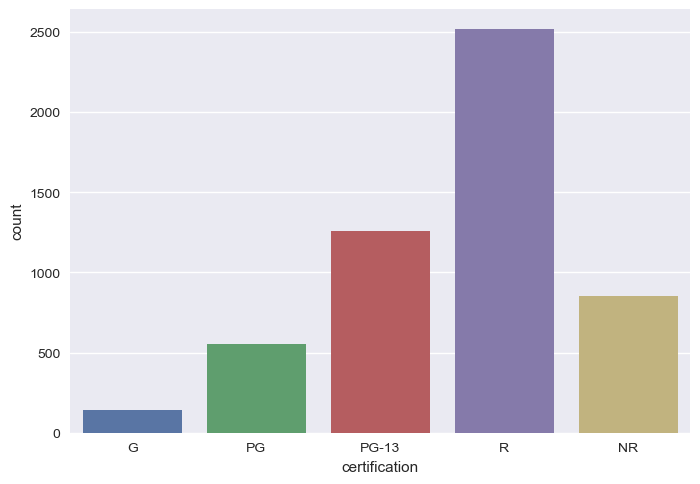

In [31]:
sns.countplot(data=df, x='certification',order=cert_order);

### What is the average revenue per certification category?

In [32]:
df.groupby(['certification'])['revenue'].apply(lambda x:x.mean())

certification
G                                  5.106936e+07
NC-17                              2.976642e+06
NR                                 2.912241e+06
Not Rated                          0.000000e+00
PG                                 7.304115e+07
PG-13                              6.485726e+07
R                                  1.364824e+07
ScreamFest Horror Film Festival    0.000000e+00
UR                                 0.000000e+00
Name: revenue, dtype: float64

In [34]:
rev_cert = profit_df([cert_order])[filter_financial].apply(lambda x:x.mean())
rev_cert

TypeError: 'DataFrame' object is not callable

### What is the average budget per certification category?

In [ ]:
df.groupby(['certification'])['budget'].apply(lambda x:x.mean())

In [ ]:
## Save current dataframe to file.
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [ ]:
# Open saved file and preview again
final_combo = pd.read_csv("Data/tmdb_results_combined.csv.gz", low_memory = False)
final_combo.head()

In [ ]:
df.info()

## Data was collected from TMBD
https://www.themoviedb.org/about/logos-attribution